In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [43]:
data=pd.read_csv('seeds.csv')

In [44]:
data.head(2)

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama wheat
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat


In [45]:
varieties=data['grain_variety']

In [46]:
del data['grain_variety']

In [47]:
data.head(2)

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956


In [48]:
X=data.iloc[:,:].values

In [49]:
X

array([[15.26  , 14.84  ,  0.871 , ...,  3.312 ,  2.221 ,  5.22  ],
       [14.88  , 14.57  ,  0.8811, ...,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 , ...,  3.337 ,  2.699 ,  4.825 ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  3.232 ,  8.315 ,  5.056 ],
       [11.84  , 13.21  ,  0.8521, ...,  2.836 ,  3.598 ,  5.044 ],
       [12.3   , 13.34  ,  0.8684, ...,  2.974 ,  5.637 ,  5.063 ]])

# KMEANS

In [50]:
from sklearn.cluster import KMeans

In [51]:
WCSS=[]
for k in range(1,11):
    km=KMeans(n_clusters=k)
    km.fit(X)
    WCSS.append(km.inertia_)
    WCSS

C:\Users\SNEHA KHANDELWAL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [52]:
print(WCSS)

[2719.8524101779526, 1011.7123453151188, 587.3186115940429, 471.0033955251924, 385.6284710967978, 323.92056948279196, 277.5347165887909, 240.56954823174468, 216.19335084204928, 198.22763788956595]


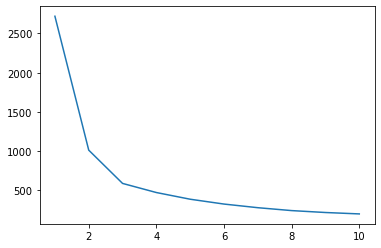

In [53]:
plt.plot(range(1,11),WCSS)

In [60]:
 km=KMeans(n_clusters=3)

In [61]:
km

KMeans(n_clusters=3)

In [62]:
y_pred=km.fit_predict(X)

In [63]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0])

In [84]:
df=pd.DataFrame({'labels':y_pred,'varieties':varieties})

In [85]:
df

,labels,varieties
0,2,Kama wheat
1,2,Kama wheat
2,2,Kama wheat
3,2,Kama wheat
4,2,Kama wheat
...,...,...
205,0,Canadian wheat
206,0,Canadian wheat
207,0,Canadian wheat
208,0,Canadian wheat


In [86]:
ct=pd.crosstab(df['labels'],df['varieties'])

In [87]:
ct

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
0,68,9,0
1,0,1,60
2,2,60,10


# HIRARCHICAL CLUSTERING

In [88]:
import scipy.cluster.hierarchy as sch

Text(0.5, 1.0, 'dendogram')

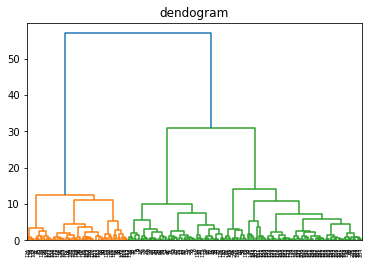

In [89]:
dg=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('dendogram')


In [90]:
from sklearn.cluster import AgglomerativeClustering

In [91]:
hc=AgglomerativeClustering(n_clusters=3)

In [92]:
y_pred=hc.fit_predict(X)

In [93]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

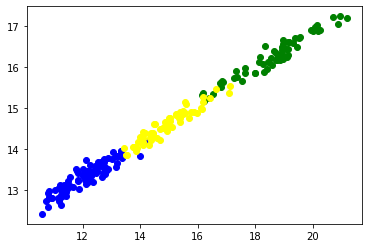

In [94]:
plt.scatter(X[y_pred==0,0],X[y_pred==0,1],c='blue',label='cluster1') 
plt.scatter(X[y_pred==1,0],X[y_pred==1,1],c='green',label='cluster1')
plt.scatter(X[y_pred==2,0],X[y_pred==2,1],c='yellow',label='cluster1')
